In [9]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')
import os
basePath = '/Users/ravipanguluri/Documents/NobelPrize/newNobelPrizeScraper/'
print(os.getcwd())

/Users/ravipanguluri/Documents/NobelPrize/newNobelPrizeScraper


## Basic View of Dataset

In [11]:
nobel_data = pd.read_json(basePath +'nobel_data.json')
nobel_data['is_winner'] = nobel_data['prize_status'].notnull()

#Dealing with input errors from data, where nonsense character is assigned to gender
nobel_data.loc[(nobel_data['Gender'] != 'M') & (nobel_data['Gender'] != 'F'), 'Gender'] = 'M'

nobel_data

ValueError: Expected object or value

In [ ]:
nominators = nobel_data[nobel_data['role'] == "Nominator"]
nominees = nobel_data[nobel_data['role'] == "Nominee"]

## Nominee Winning Percentage

In [65]:
unique_nominees = nominees.drop_duplicates(subset=['Name'])
num_winners = unique_nominees['is_winner'].sum()
print("Number of winners: ",num_winners)
print("Winning %: ",(num_winners/len(unique_nominees.index)) *100)

Number of winners:  373
Winning %:  11.438209138301135


## Gender Proportion Plots

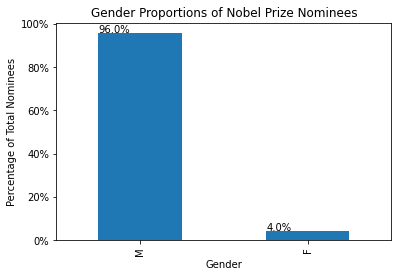

In [66]:
fig, ax = plt.subplots(1,1)
unique_nominees['Gender'].value_counts(normalize = True).plot(kind = 'bar', ax=ax)

for p in ax.patches:
    txt = np.round(p.get_height(), decimals=2) * 100
    ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Nominees")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominees")
ax.yaxis.set_major_formatter(PercentFormatter(1))

This plot represents the proportion of nominees in all categories over the total time period in which observations were recorded (1901-1967) that are male and female. Overall there is a whopping 96% of nominees who were male against only 4% female, showing a tremendous gender disparity

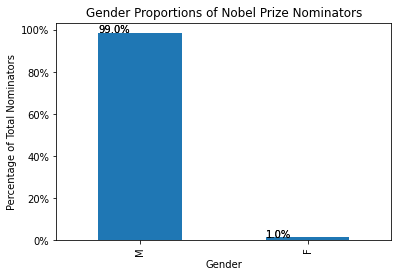

In [67]:
unique_nominators = nominators.drop_duplicates(subset=['Name'])

fig, ax = plt.subplots(1,1)
unique_nominators['Gender'].value_counts(normalize = True).plot(kind = 'bar', ax = ax)
for p in ax.patches:
    for p in ax.patches:
        txt = np.round(p.get_height(), decimals=2) * 100
        ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Nominators")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominators")
ax.yaxis.set_major_formatter(PercentFormatter(1))

This plot captures the proportion of nominators that were male and female. The gender disparity is even more profound with the nominators, with 99% being male to 1% being female.

Text(0.5, 0, 'Year')

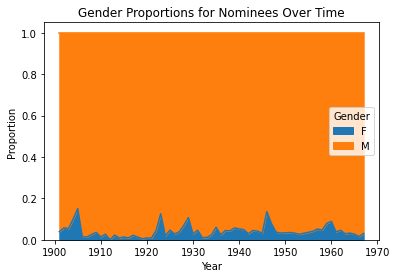

In [68]:
fig, ax = plt.subplots(1,1)
nominees_gender = nominees.groupby('year')['Gender'].value_counts(normalize=True).unstack()
nominees_gender.plot(kind ='area', legend = True, ax=ax)
ax.set_title("Gender Proportions for Nominees Over Time")
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")

Text(0.5, 0, 'Year')

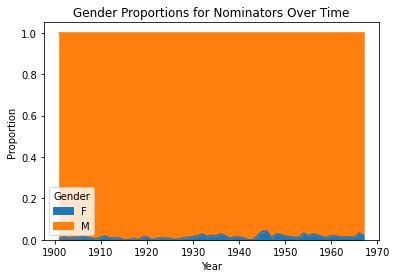

In [69]:
fig, ax = plt.subplots(1,1)
nominators_gender = nominators.groupby('year')['Gender'].value_counts(normalize=True).unstack()
nominators_gender.plot(kind ='area', legend = True, ax=ax)
ax.set_title("Gender Proportions for Nominators Over Time")
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")

## Gender Proportions By Category

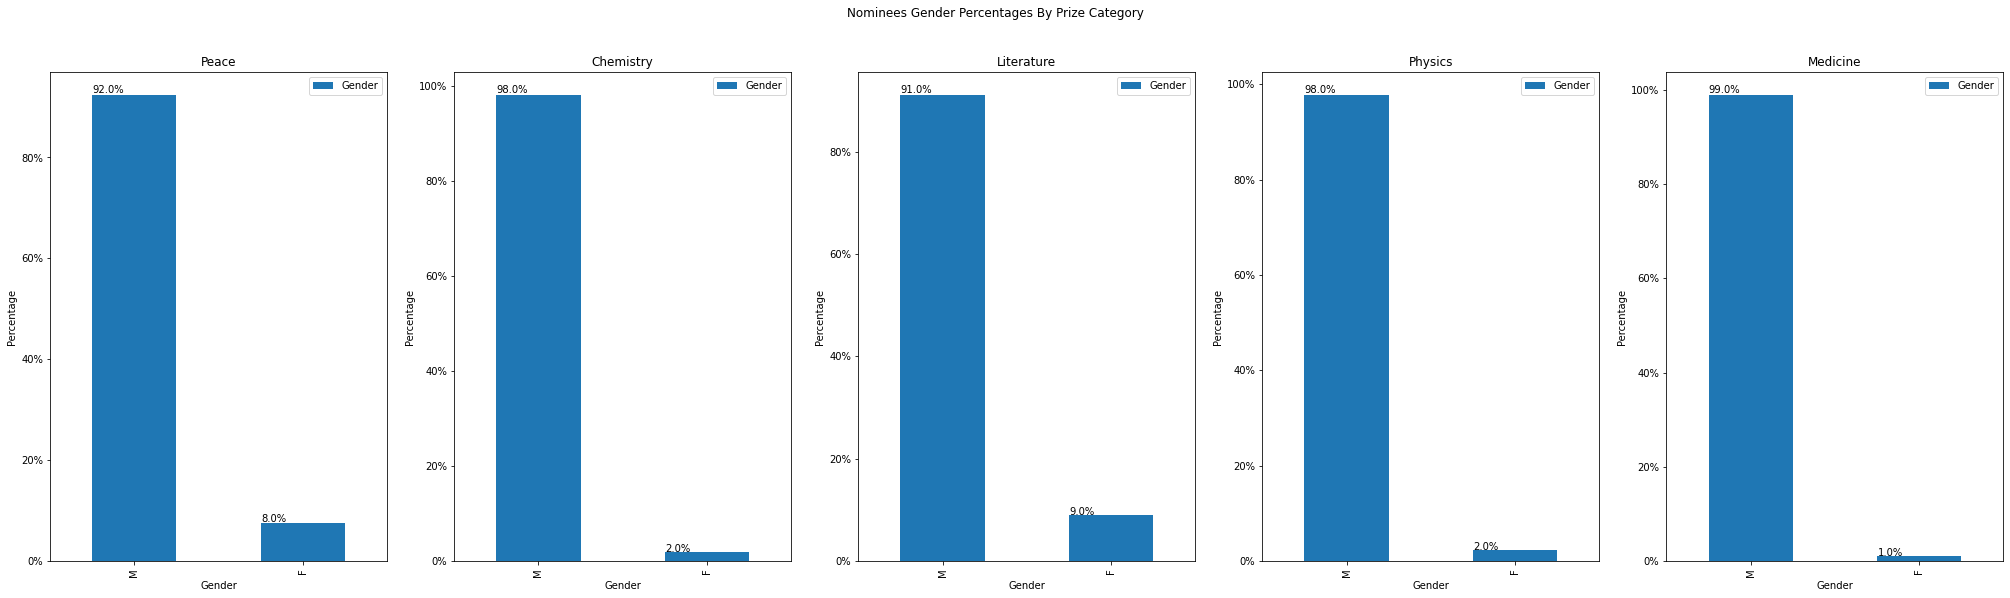

In [70]:
fig, axes = plt.subplots(1,5, figsize = (35,9))
fig.suptitle("Nominees Gender Percentages By Prize Category")

nominees_grouped = nominees.groupby('category')
# nominees.groupby('category')['Gender'].value_counts(normalize = True).unstack().plot(kind = 'bar', legend = True, ax=ax)
plot_areas = zip(nominees_grouped.groups.keys(), axes.flatten()) # creates list so that I can match plotting axes with group keys when I iterate

#Helper function to fix string formatting
def getSubtitle(key):
    if "Peace" in key:
        return "Peace"
    else:
        return key.split(" ")[-1]

for idx, (key, ax) in enumerate(plot_areas):
    group = nominees_grouped.get_group(key)
    subtitle = getSubtitle(key)
    group['Gender'].value_counts(normalize = True).plot(kind = 'bar', legend = True, ax=ax)
    ax.set_title(subtitle)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Percentage")
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for p in ax.patches:
        txt = np.round(p.get_height(), decimals=2) * 100
        ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

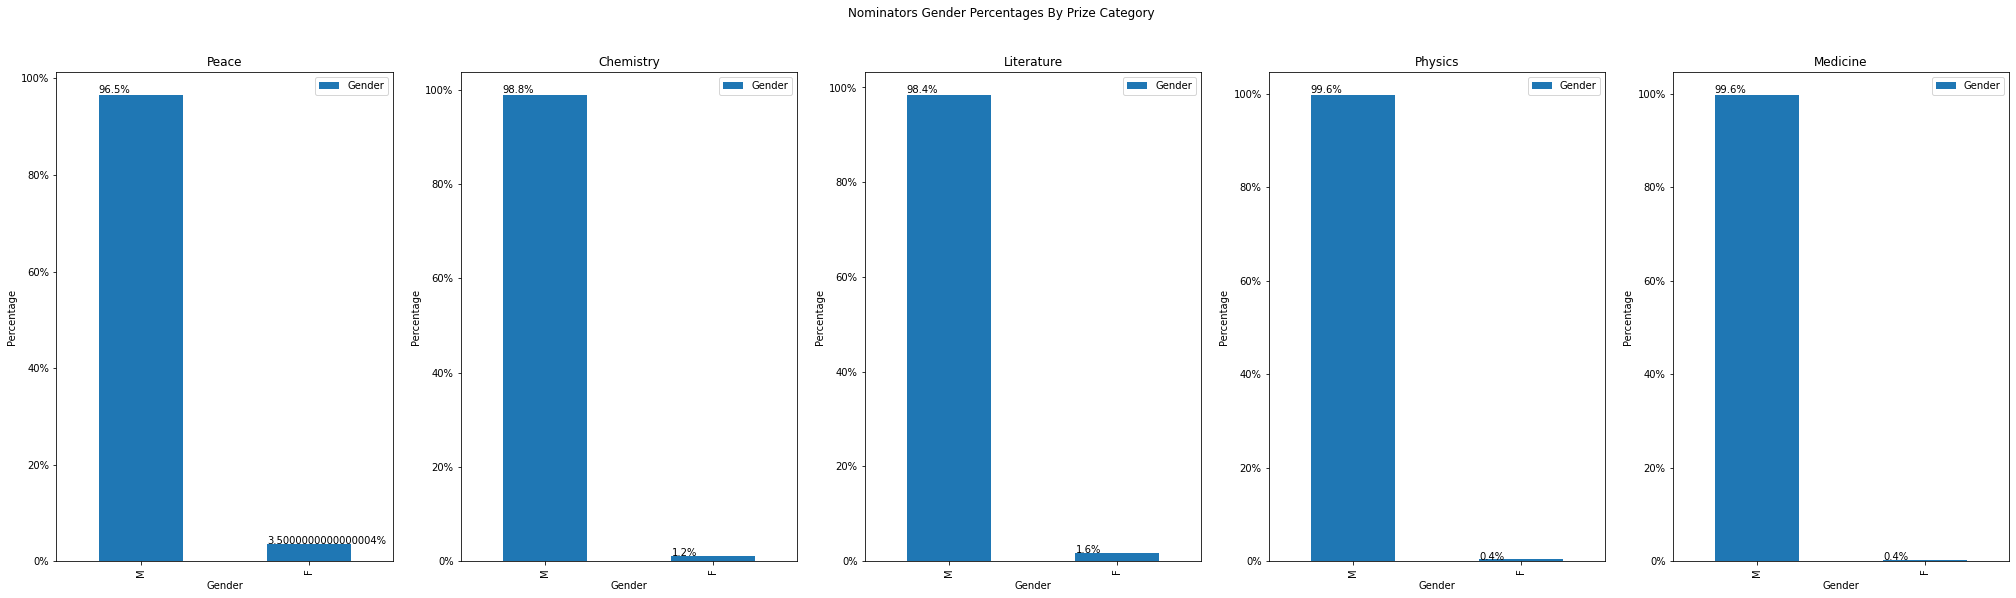

In [88]:
fig, axes = plt.subplots(1,5, figsize = (35,9))
fig.suptitle("Nominators Gender Percentages By Prize Category")

nominators_grouped = nominators.groupby('category')
# nominees.groupby('category')['Gender'].value_counts(normalize = True).unstack().plot(kind = 'bar', legend = True, ax=ax)
plot_areas = zip(nominators_grouped.groups.keys(), axes.flatten()) # creates list so that I can match plotting axes with group keys when I iterate

for idx, (key, ax) in enumerate(plot_areas):
    group = nominators_grouped.get_group(key)
    subtitle = getSubtitle(key)
    group['Gender'].value_counts(normalize = True).plot(kind = 'bar', legend = True, ax=ax)
    ax.set_title(subtitle)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Percentage")
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for p in ax.patches:
    	txt = np.round(p.get_height(), decimals=3) * 100
    	ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

### Is there at least marginally greater representation of women among winners?

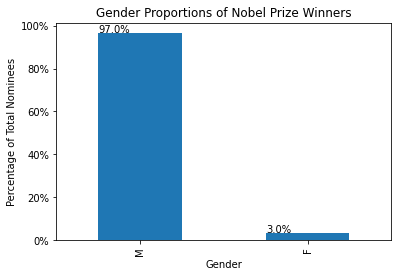

In [72]:
winners = unique_nominees[unique_nominees['is_winner'] == True]

fig, ax = plt.subplots(1,1)
winners['Gender'].value_counts(normalize = True).plot(kind = 'bar', ax=ax)

for p in ax.patches:
    txt = np.round(p.get_height(), decimals=2) * 100
    ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Winners")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominees")
ax.yaxis.set_major_formatter(PercentFormatter(1))

## Age Distributions Nominees/Nominators by overall/by category/binned changes in the distributions

In [73]:
nominators.describe()

,year,"Year, Birth","Year, Death"
count,18792.000000,5229.000000,4912.000000
mean,1935.366379,1879.694397,1960.376221
std,19.709333,24.532483,25.842870
min,1901.000000,1647.000000,1885.000000
25%,1919.000000,1862.000000,1940.000000
50%,1935.000000,1882.000000,1964.000000
75%,1953.000000,1899.000000,1980.000000
max,1967.000000,1956.000000,2017.000000


In [74]:
nominees.describe()

,year,"Year, Birth","Year, Death"
count,22147.000000,18225.000000,16785.000000
mean,1935.733824,1877.929712,1956.947036
std,19.591170,24.037674,25.266414
min,1901.000000,1647.000000,1901.000000
25%,1920.000000,1861.000000,1938.000000
50%,1935.000000,1878.000000,1960.000000
75%,1953.000000,1896.000000,1974.000000
max,1967.000000,1987.000000,2019.000000


In [75]:
nominees_people = nominees[nominees['category'] != "Nomination for Nobel Peace Prize"] #filtering out category where organizations are often nominated
nominees_people.describe()

,year,"Year, Birth","Year, Death"
count,17148.000000,14577.000000,13258.000000
mean,1936.392291,1880.459628,1959.792729
std,19.133513,22.428357,24.929737
min,1901.000000,1815.000000,1901.000000
25%,1921.000000,1864.000000,1941.000000
50%,1936.000000,1881.000000,1963.000000
75%,1953.000000,1899.000000,1976.000000
max,1966.000000,1987.000000,2019.000000


Through data checking, I am confident that most if not all organizational start dates have been filtered out of the dataset through taking the nobel peace prize out of consideration. If nominees are unnamed in categories, they will not have a birth or death year meaning they will not be used in the calculations.

In [76]:
def getAge(birth, nom_year):
    return nom_year - birth;
def getAgeDeath(birth, death):
    return death - birth;

'''Every single column in which the age is negative has to do with an error when typing the nomination where a year in the 1900's was put instead of the 1800's. 
In this case, all the birth years are off by exactly 100 years.'''
    
nominees_people.loc[nominees_people['Year, Birth'] > nominees_people['Year, Death'], 'Year, Birth'] = nominees_people['Year, Birth'].sub(100)        
nominees_people['is_dead'] = nominees_people['Year, Death'].notnull()
nominees_people['age'] = getAge(nominees_people['Year, Birth'], nominees_people['year'])
nominees_people['age_death'] = getAgeDeath(nominees_people['Year, Birth'], nominees_people['Year, Death'])

In [77]:
nominees_people['age'].describe()

count    14577.000000
mean        56.763189
std         12.127203
min         19.000000
25%         48.000000
50%         56.000000
75%         65.000000
max         97.000000
Name: age, dtype: float64

In [78]:
nominees_people['age_death'].describe()

count    13257.000000
mean        78.597043
std         10.638146
min         33.000000
25%         72.000000
50%         79.000000
75%         86.000000
max        105.000000
Name: age_death, dtype: float64

count    35.000000
mean      2.942857
std       3.864947
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      18.000000
Name: years_after_death, dtype: float64

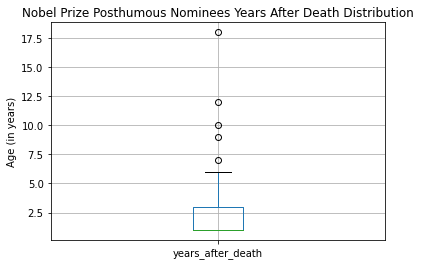

In [79]:
# Posthumous Nominations
nominees_posthumous = nominees_people[nominees_people['year']>nominees_people['Year, Death']]
nominees_posthumous['years_after_death'] = nominees_posthumous['year'] - nominees_posthumous['Year, Death']
nominees_posthumous.boxplot(column = ['years_after_death'])
plt.title("Nobel Prize Posthumous Nominees Years After Death Distribution")
plt.ylabel("Age (in years)")
nominees_posthumous['years_after_death'].describe()

Nobel Prize Nominations made posthumously are typically made very shortly after a person dies. 1 year being the minimum and 3 years is the 75 percentile for number of years after death when the nomination was submitted. This is likely because shortly after one's death in when their accomplishments are remembered. So if anyone really felt compelled to make a nomination after someone dies, this would be the time to do it. Furthermore, very few nominations (35) are made after death, so they are probably only made under very special circumstances.

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Nomination for Nobel Prize in Chemistry,9.0,4.333333,5.722762,1.0,1.0,2.0,3.0,18.0
Nomination for Nobel Prize in Literature,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
Nomination for Nobel Prize in Physics,9.0,4.666667,4.242641,1.0,1.0,2.0,7.0,12.0
Nomination for Nobel Prize in Physiology or Medicine,16.0,1.312500,0.873212,1.0,1.0,1.0,1.0,4.0


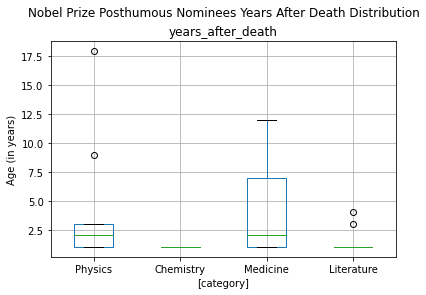

In [80]:
nominees_posthumous.boxplot(column = ['years_after_death'], by = ['category'])
plt.suptitle("Nobel Prize Posthumous Nominees Years After Death Distribution", y = 1.02)
plt.xticks([1, 2, 3, 4], [getSubtitle(cat) for cat in nominees_posthumous['category'].unique()])
plt.ylabel("Age (in years)")
nominees_posthumous.groupby('category')['years_after_death'].describe()

count    12976.000000
mean        56.585465
std         11.945435
min         19.000000
25%         48.000000
50%         56.000000
75%         65.000000
max         97.000000
Name: age, dtype: float64

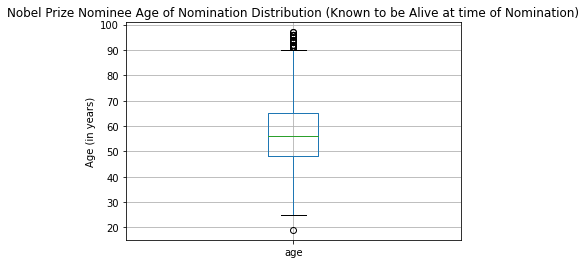

In [81]:
nominees_alive = nominees_people[nominees_people['year']<nominees_people['Year, Death']]
nominees_alive.boxplot(column = ['age'])
plt.title("Nobel Prize Nominee Age of Nomination Distribution (Known to be Alive at time of Nomination)")
plt.ylabel("Age (in years)")
nominees_alive['age'].describe()

IMPORTANT NOTE: This is not the complete set of nominees alive at time of nomination because there are many nominees that do not have a recorded year of death, even though they have indeed died. But to go through and correct each faulty observation is not feasible. Therefore, the best course of action was to reduce the extent of the dataset to nominees that were known to be alive at the time of nomination. 

For nominees known to be alive at the time of their nomination (i.e. Year, Death is not a null value for the column), the mean age to recieve a nomination is 56 years old. The 25th percentile is 48 years old and the 75th percentile is 65 years old. The old age of nominees makes sense, since the nobel prize is a lifetime achievement award. Thus, it takes time to accumulate the requisite accomplishments that are worthy of a nomination for the nobel prize.

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Nomination for Nobel Prize in Chemistry,3018.0,55.098410,11.040165,29.0,47.0,54.0,63.0,96.0
Nomination for Nobel Prize in Literature,2833.0,63.787151,11.892388,29.0,56.0,63.0,71.0,97.0
Nomination for Nobel Prize in Physics,3256.0,50.507371,10.437199,19.0,43.0,50.0,57.0,87.0
Nomination for Nobel Prize in Physiology or Medicine,3869.0,57.587232,10.796053,25.0,50.0,57.0,65.0,85.0


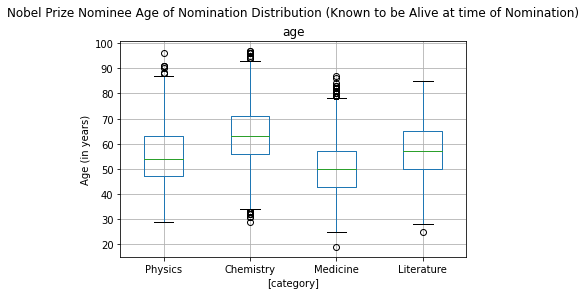

In [82]:
nominees_alive.boxplot(column = ['age'], by = ['category'])
plt.suptitle("Nobel Prize Nominee Age of Nomination Distribution (Known to be Alive at time of Nomination)", y = 1.02)
plt.xticks([1, 2, 3, 4], [getSubtitle(cat) for cat in nominees_alive['category'].unique()])
plt.ylabel("Age (in years)")
nominees_alive.groupby('category')['age'].describe()

In [83]:
nominators.describe()

,year,"Year, Birth","Year, Death"
count,18792.000000,5229.000000,4912.000000
mean,1935.366379,1879.694397,1960.376221
std,19.709333,24.532483,25.842870
min,1901.000000,1647.000000,1885.000000
25%,1919.000000,1862.000000,1940.000000
50%,1935.000000,1882.000000,1964.000000
75%,1953.000000,1899.000000,1980.000000
max,1967.000000,1956.000000,2017.000000


In [84]:
nominators_people = nominators.loc[nominators['Year, Birth'] > 1800] #filtering out non-human nominees where birth year is given
'''Rows contained nominators that somehow made nomiations before they were born.
The reason for these errors was not clear so they were simply dropped from the analysis'''
nominators_people = nominators_people.drop(895)
nominators_people = nominators_people.drop(14083)


nominators_people.loc[nominators_people['Year, Birth'] > nominators_people['Year, Death'], 'Year, Birth'] = nominators_people['Year, Birth'].sub(100)
nominators_people['age'] = getAge(nominators_people['Year, Birth'], nominators_people['year'])

count    5220.000000
mean       59.298084
std        12.388751
min         2.000000
25%        51.000000
50%        59.000000
75%        68.000000
max       156.000000
Name: age, dtype: float64

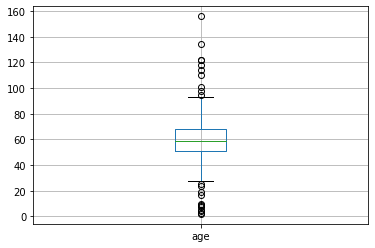

In [85]:
nominators_people.boxplot(column = ['age'])
nominators_people['age'].describe()

Clearly there are still some data errors present as there is no way that nominations could be made at the age of two. However, overall the distribution suggests that the mean age of nomination is 59, the 75th percentile is 68, and the 25th percentile if 51. Older people tend to comprise the nominators as it takes a large body of work and prestige to be named a nobel prize nominator.

count    5220.000000
mean       59.298084
std        12.388751
min         2.000000
25%        51.000000
50%        59.000000
75%        68.000000
max       156.000000
Name: age, dtype: float64

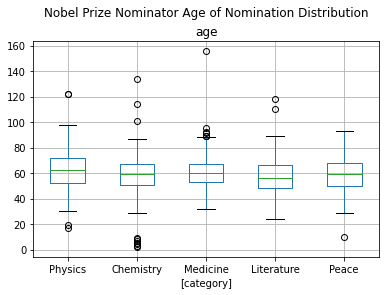

In [86]:
nominators_people.boxplot(column = ['age'], by = ['category'])
plt.suptitle("Nobel Prize Nominator Age of Nomination Distribution", y = 1.02)
plt.xticks([1, 2, 3, 4, 5], [getSubtitle(cat) for cat in nominators_people['category'].unique()])
nominators_people['age'].describe()

A cluster in the Chemistry distribution below the 25th percentile appears to be where the error is occuring.

# Do Women Nominate Other Women More Frequently Then Men?

In [1]:
nobel_data.groupby('url')

NameError: name 'nobel_data' is not defined